# GregoriOCR

In [1]:
#Libraries
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder

In [20]:
#Load Data
#Image data
X = []
for file in os.listdir('./Note Data'):
    img = Image.open(f'./Note Data/{file}')
    X.append(np.array(img))
X = np.array(X)
X = X.reshape([100, 138, 34, 4])


#Labels
y = []
text_file = open("Note_label.txt", "r") #open text file in read mode
data = text_file.read() #read whole file to a string
text_file.close() #close file

for char in data:
    if char.isalpha():
        y.append(char)
y = np.array(y)
unencoded_labels = np.unique(y)

#Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
encoded_labels = np.unique(y)

label_dict = {
    encoded_labels[0]: unencoded_labels[0],
    encoded_labels[1]: unencoded_labels[1],
    encoded_labels[2]: unencoded_labels[2],
    encoded_labels[3]: unencoded_labels[3],
    encoded_labels[4]: unencoded_labels[4],
}

In [21]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

(90, 138, 34, 4)
(90,)
(10, 138, 34, 4)
(10,)


In [4]:
#One-hot Encode y_train
ohe_y_train = np.eye(np.max(y)+1)[y_train]
#ohe_y = np.eye(np.max(y)+1)[y]

In [15]:
model = Sequential()

#LAYERS:
#Convulusional layers:
model.add(Conv2D(16, (3, 3), activation='selu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='selu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='selu'))


#Always flatten inputs after you convulusional layers are finished:
model.add(Flatten())

#Non-convolusional layers:
#model.add(Dense(units=30, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dense(units=15, activation='relu'))

#Output Layer:
model.add(Dense(units=ohe_y_train.shape[1], activation='softmax'))

In [16]:
#COMPILING THE MODEL
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [17]:
#TRAIN THE MODEL
model.fit(X_train.astype('float'), ohe_y_train, validation_split=0.1, batch_size=X.shape[0], epochs=60)

Epoch 1/60
1/1 [==============================] - 1s 646ms/step - loss: 82.7097 - val_loss: 103.9976
Epoch 2/60
1/1 [==============================] - 0s 178ms/step - loss: 201.3058 - val_loss: 279.1649
Epoch 3/60
1/1 [==============================] - 0s 197ms/step - loss: 330.3999 - val_loss: 392.2513
Epoch 4/60
1/1 [==============================] - 0s 199ms/step - loss: 368.9063 - val_loss: 270.0301
Epoch 5/60
1/1 [==============================] - 0s 175ms/step - loss: 240.0204 - val_loss: 118.9952
Epoch 6/60
1/1 [==============================] - 0s 182ms/step - loss: 102.6161 - val_loss: 58.1618
Epoch 7/60
1/1 [==============================] - 0s 202ms/step - loss: 57.8964 - val_loss: 34.2580
Epoch 8/60
1/1 [==============================] - 0s 180ms/step - loss: 57.9104 - val_loss: 17.5755
Epoch 9/60
1/1 [==============================] - 0s 212ms/step - loss: 56.3034 - val_loss: 25.4548
Epoch 10/60
1/1 [==============================] - 0s 214ms/step - loss: 54.1837 - val_los

In [18]:
#PREDICT TEST DATA
yhat_test = model.predict(X_test.astype(float))

yhat = []
for y in yhat_test:
    yhat.append(np.argmax(y))
yhat = np.array(yhat)

print('Model Classification Report:')
print(classification_report(y_test, yhat))

1/1 [==============================] - 0s 52ms/step
Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         2
           4       0.25      0.33      0.29         3

    accuracy                           0.20        10
   macro avg       0.25      0.13      0.16        10
weighted avg       0.38      0.20      0.24        10



C:\Users\cenny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cenny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cenny\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

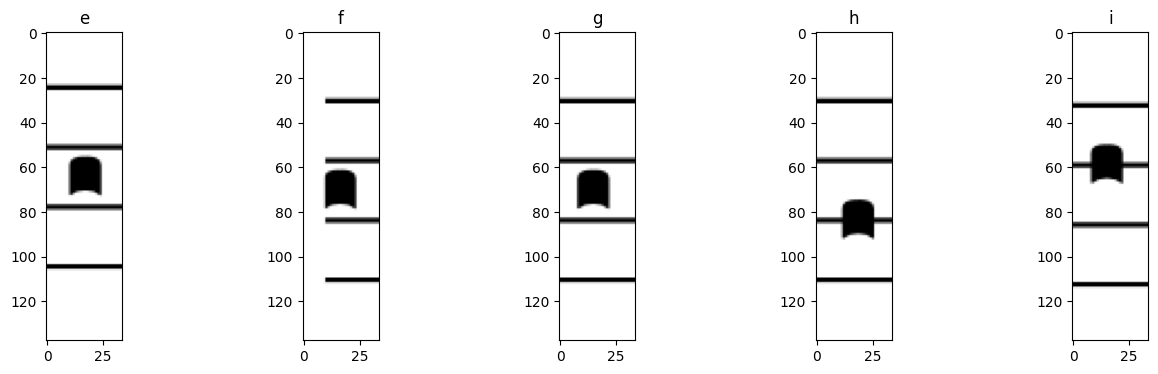

In [19]:
#n = 5
#imgs = X_test
#fig, ax = plt.subplots(1, n, figsize=(16,4))

#for label in encoded_labels:
#    if label in yhat:
#        index = np.where(yhat == label)[0][0]
#        ax[label].imshow(imgs[index])
#        ax[label].set_title(f'{label_dict[yhat[index]]}')
#    else:
#        ax[label].set_title(f'Did not find: {label_dict[label]}')